In [2]:
# %load ../uoicorr_imports.py
# %load uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
    parent_path, current_dir = os.path.split(parent_path)
    print(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
    sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

    if '%s/uoicorr' % p not in sys.path:
        sys.path.append('%s/uoicorr' % p)
    if '%s/PyUoI' % p not in sys.path:
        sys.path.append('%s/PyUoI' % p)

elif os.name == 'posix':

    pass

else:
    # And standard list of subdirectories
    if '%s\\pyuoi' % p not in sys.path:
        sys.path.append('%s\\pyuoi' % p)
    if '%s\\uoicorr' % p not in sys.path:
        sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir
from utils import FNR, FPR, selection_accuracy

C:\Users\akumar\nse
C:\Users\akumar


### Test whether sklearn's built-in covariance estimation methods work for our purposes

In [3]:
from utils import gen_covariance, gen_beta, gen_data, interpolate_covariance, gen_beta2

In [4]:
import itertools, time, pickle

In [5]:
from sklearn.covariance import EmpiricalCovariance, GraphicalLassoCV, LedoitWolf, MinCovDet, OAS, ShrunkCovariance

In [6]:
from cov_estimators import banding, inverse_banding, factor_model

In [22]:
with open('../all_estimators.dat', 'rb') as f:
    f.seek(0)
    e1 = pickle.load(f)

with open('../all_estimators2.dat', 'rb') as f:
    f.seek(0)
    e2 = pickle.load(f)
    
with open('../all_estimators3.dat', 'rb') as f:
    f.seek(0)
    e3 = pickle.load(f)

with open('../all_estimators4.dat', 'rb') as f:
    f.seek(0)
    e4 = pickle.load(f)

In [8]:
e1.shape

(3, 2, 4, 2, 3, 7)

In [9]:
e2.shape

(3, 1, 4, 2, 3, 7)

In [23]:
e3.shape

(3, 1, 4, 2, 3, 7)

In [25]:
e4.shape

(3, 2, 4, 2, 3, 7)

In [27]:
error = np.zeros((6, 3, 4, 2, 3, 7))
error[0:3, 0:2, ...] = e1[:, 0:2, ...]
error[3:6, 2, ...] = e2[:, 0, ...]
error[0:3, 2,...] = e3[:, 0, ...]
error[3:6, 0:2, ...] = e4[:, 0:2, ...]

In [15]:
# Exhaustively generate all types of covariance matrices
n_samples = [12, 20, 30, 50, 100, 200]
n_features = 100
block_size = [5, 10, 25]
block_correlation = [0.05, 0.1, 0.25, 0.5]
sparsity= [1]
L = [10, 25]
betawidth = 5

shape = ((len(n_samples), len(block_size), len(block_correlation), len(L), len(sparsity), 3))

methods = ['Empirical', 'Naive Shrinkage', 'OAS', 'Banding', 'Inverse Banding', 'Thresholding']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
estimates = {method : [] for method in methods}

In [ ]:
e[0]

In [41]:
np.reshape(error[:, i1, :, :, 0, i4], (6, -1)).shape

(6, 8)

In [39]:
np.mean(np.reshape(error[:, i1, :, :, 0, i4], (6, -1)), axis = 1).shape

(6,)

In [47]:
error[:, 0, 0, 0, 0, 3]

array([0.01110356, 0.01018742, 0.01008518, 0.01000387, 0.01004346,
       0.00989768])

In [50]:
import matplotlib.lines as mlines

In [58]:
np_ratio = np.array(n_samples)/100

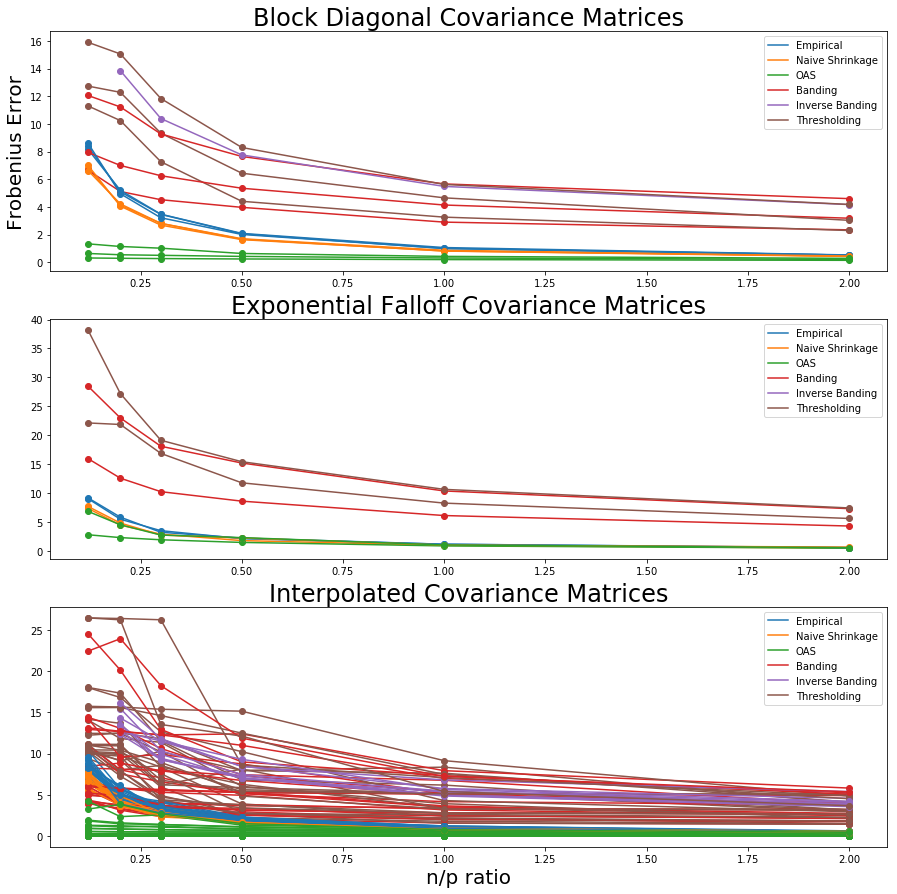

In [64]:
# Generate separate plots for each covariance type, coloring by method, and plotting as a function of n/p ratio
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
handles = []
for i1 in range(3):
    for ii, i4 in enumerate([0, 1, 3, 4, 5, 6]):
        if np.any(error[:, i1, i2, :, 0, i4] == 0):
            continue
        ax[0].plot(np_ratio, np.mean(np.reshape(error[:, i1, :, :, 0, i4], (6, -1)), axis = 1), '-o', color = colors[ii])

l0 = mlines.Line2D([], [], color='C0', label = methods[0])
l1 = mlines.Line2D([], [], color='C1', label = methods[1])
l2 = mlines.Line2D([], [], color='C2', label = methods[2])
l3 = mlines.Line2D([], [], color='C3', label = methods[3])
l4 = mlines.Line2D([], [], color='C4', label = methods[4])
l5 = mlines.Line2D([], [], color='C5', label = methods[5])

ax[0].legend(handles = [l0, l1, l2, l3, l4, l5])

for i1 in range(2):
    for ii, i4 in enumerate([0, 1, 3, 4, 5, 6]):
        if np.any(error[:, :, :, i1, 2, i4] == 0):
            continue
        ax[1].plot(np_ratio, np.mean(np.reshape(error[:, :, :, i1, 2, i4], (6, -1)), axis = 1), '-o', color = colors[ii])

ax[1].legend(handles = [l0, l1, l2, l3, l4, l5])
        
for i1 in range(3):
    for i2 in range(4):
        for i3 in range(2):
            for ii, i4 in enumerate([0, 1, 3, 4, 5, 6]):
                if np.any(error[:, i1, i2, i3, 0, i4] == 0):
                    continue
                ax[2].plot(np_ratio, error[:, i1, i2, i3, 0, i4], '-o', color = colors[ii])

ax[2].legend(handles = [l0, l1, l2, l3, l4, l5])     

ax[0].set_title('Block Diagonal Covariance Matrices', fontsize = 24)
ax[1].set_title('Exponential Falloff Covariance Matrices', fontsize = 24)
ax[2].set_title('Interpolated Covariance Matrices', fontsize = 24)

ax[0].set_ylabel('Frobenius Error', fontsize = 20)
ax[2].set_xlabel('n/p ratio', fontsize = 20)
plt.savefig('../figs/cov_estimation.pdf', bbox_inches = 'tight', pad_inches = 0)